(42000, 785)
(28000, 784)
Classification report for Random Forest RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2200
          1       0.97      0.98      0.98      2418
          2       0.93      0.93      0.93      2167
          3       0.90      0.92      0.91      2270
          4       0.93      0.93      0.93      2101
          5       0.93      0.92      0.92      2001
          6       0.96      0.97      0.96      2155
          7       0.95      0.95      0.95      2331
          8       0.92      0.89  

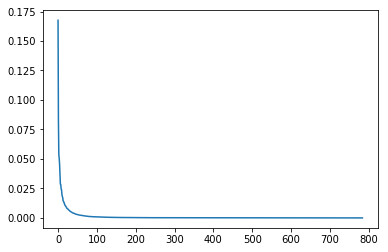

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import  metrics
np.random.seed(1)
# get data
#Kfold_ds= pd.read_csv('C:/Users/savi0/OR568_Digit_savi/kfold_sample_sets.data')
test  = pd.read_csv('C:/Users/savi0/OR568_Digit_savi/test.csv')
train = pd.read_csv('C:/Users/savi0/OR568_Digit_savi/train.csv')
print(train.shape)
print(test.shape)
train.head()

## normalize data ##
label_train=train['label']
train=train.drop('label', axis=1)
#print(label_train)

train = train / 255
test = test / 255
train['label'] = label_train
#print(train['label'])
#PCA

#from sklearn import decomposition
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=785)
pca.fit(train)
plt.plot(pca.explained_variance_ratio_)
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

#decompose test data
#pca.fit(test)
PCtest = pd.DataFrame(pca.transform(test))
y = PCtrain['label'][0:20000]
X=PCtrain.drop('label', axis=1)[0:20000]
#Random Forest
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
#k_fold = KFold(n_splits=3)
#https://stackoverflow.com/questions/47949233/random-forest-python-sklearn

clf2 = RandomForestClassifier(n_estimators =50)
clf2.fit(X, y)


predicted2 = clf2.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected2 = PCtrain['label'][20001:42000]

print("Classification report for Random Forest %s:\n%s\n"% (clf2, metrics.classification_report(expected2, predicted2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected2, predicted2))

Results_RF=clf2.predict(PCtest)

print(clf2.feature_importances_)
np.savetxt('resultN.csv', 
           np.c_[range(1,len(PCtest)+1),Results_RF], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')